# 1. 데이터 불러오기

In [291]:
import pandas as pd
train = pd.read_csv('./data/lspoons_train.csv')

test = pd.read_csv('./data/lspoons_test.csv')

store = pd.read_csv('./data/store.csv')

In [292]:
train

,id,Store,Date,Sales,Promo,StateHoliday,SchoolHoliday
0,14929,85,2015-05-01,11360,1,a,0
1,14930,512,2015-05-01,10534,1,a,0
2,14931,1097,2015-05-01,17039,1,a,0
3,14932,1,2015-04-30,6228,1,0,0
4,14933,9,2015-04-30,9717,1,0,0
...,...,...,...,...,...,...,...
62239,77168,1106,2014-08-01,5284,1,0,1
62240,77169,1108,2014-08-01,6249,1,0,1
62241,77170,1111,2014-08-01,5199,1,0,1
62242,77171,1112,2014-08-01,10058,1,0,1


### 1.1 원핫인코딩

In [293]:
train = pd.get_dummies(data = train, columns=['StateHoliday'])
test = pd.get_dummies(data = test, columns=['StateHoliday'])

In [294]:
test['StateHoliday_b'] = 0
test['StateHoliday_c'] = 0

In [295]:
store = pd.get_dummies(columns = ['PromoInterval'], data=store)
store = pd.get_dummies(data=store, columns = ['StoreType'])
store = pd.get_dummies(data=store, columns = ['Assortment'])

# 2. 피처 엔지니어링

#### DATETIME으로 변환

In [296]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

#### 년, 월, 일 컬럼 추가

In [297]:
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['week'] = train['Date'].dt.weekofyear

test['year'] = test['Date'].dt.year
test['month'] = test['Date'].dt.month
test['week'] = test['Date'].dt.weekofyear

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


#### Store 데이터와 병합

In [298]:
train

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,year,month,week
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,2015,5,18
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,2015,5,18
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,2015,5,18
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,2015,4,18
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,2015,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62239,77168,1106,2014-08-01,5284,1,1,1,0,0,0,2014,8,31
62240,77169,1108,2014-08-01,6249,1,1,1,0,0,0,2014,8,31
62241,77170,1111,2014-08-01,5199,1,1,1,0,0,0,2014,8,31
62242,77171,1112,2014-08-01,10058,1,1,1,0,0,0,2014,8,31


In [299]:
train = pd.merge(train, store, how = 'left', on = 'Store')

In [300]:
test = pd.merge(test, store, how = 'left', on = 'Store')

# 3. 베이스라인 모델링

In [268]:
train.columns

Index(['id', 'Store', 'Date', 'year', 'month', 'week', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'Sales', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [303]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators= 300, learing_rate=0.1, random_state=2020)

In [304]:
xgb.fit(train[['year', 'month', 'week', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c']],train['Sales'] )

[19:28:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learing_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learing_rate=0.1, learning_rate=0.300000012, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=12,
             num_parallel_tree=1, random_state=2020, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [305]:
input_var = ['year', 'month', 'week', 'Promo',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c']

### 3.1 shap value를 통한 변수 비중 확인

In [306]:
import shap

shap_values = shap.TreeExplainer(xgb).shap_values(train[input_var])

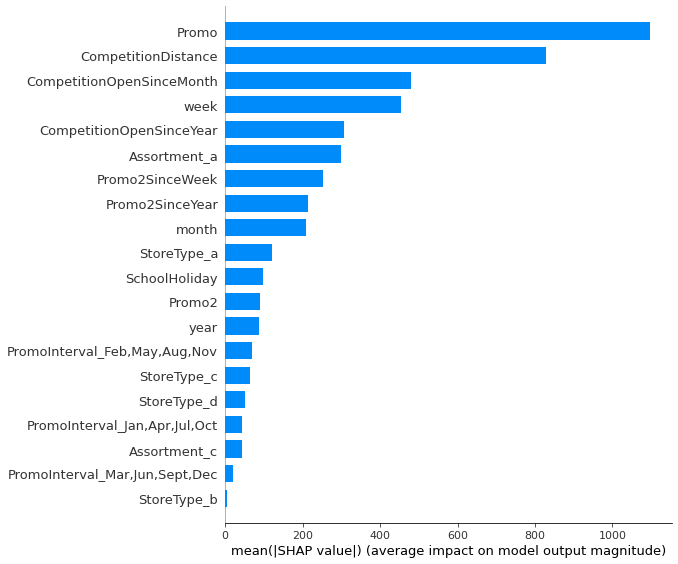

In [307]:
shap.summary_plot(shap_values, train[input_var], plot_type='bar')

#### 상위 7개 변수에 대한 shap value 확인

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


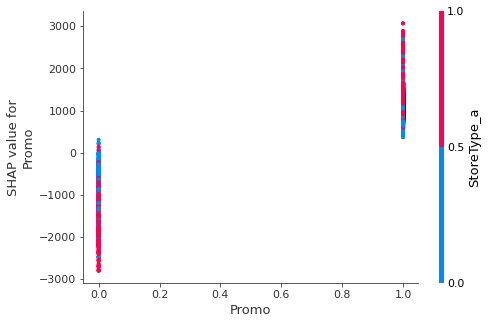

In [308]:
shap.dependence_plot('Promo', shap_values, train[input_var])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


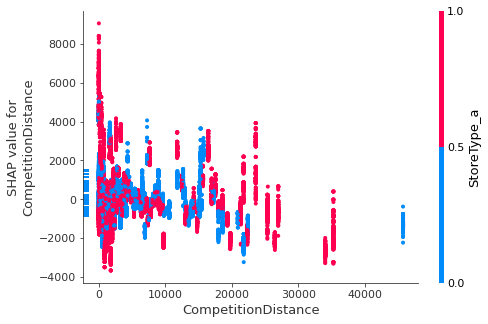

In [309]:
shap.dependence_plot('CompetitionDistance', shap_values, train[input_var])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


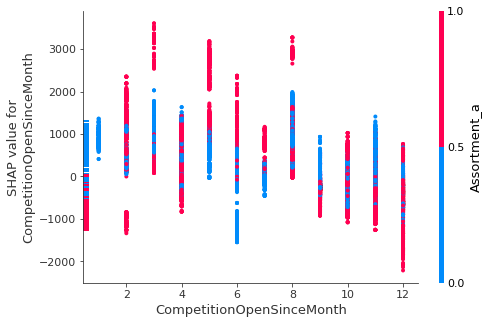

In [310]:
shap.dependence_plot('CompetitionOpenSinceMonth', shap_values, train[input_var])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


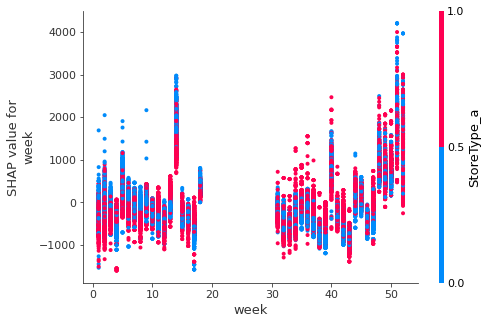

In [311]:
shap.dependence_plot('week', shap_values, train[input_var])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


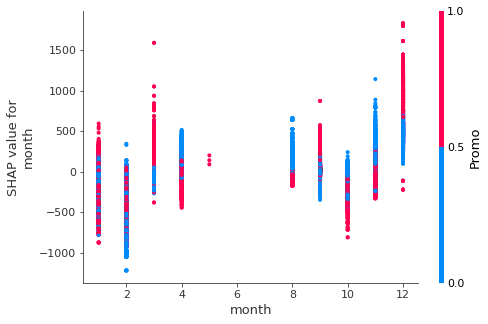

In [312]:
shap.dependence_plot('month', shap_values, train[input_var])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


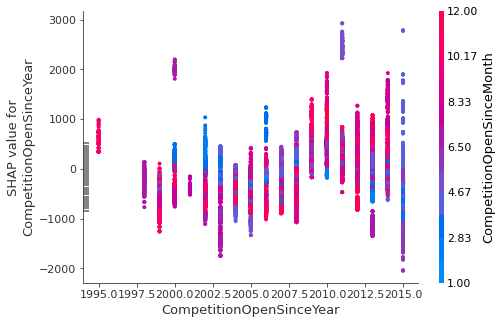

In [313]:
shap.dependence_plot('CompetitionOpenSinceYear', shap_values, train[input_var])

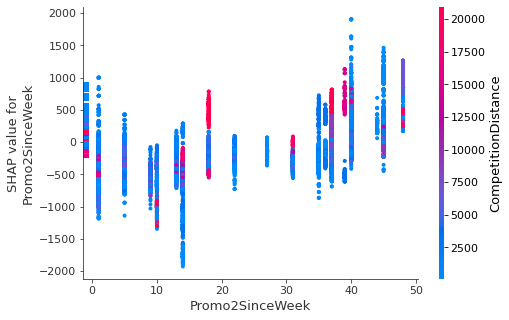

In [314]:
shap.dependence_plot('Promo2SinceWeek', shap_values, train[input_var])

# 4. 2차 피처엔지니어링

#### 대체적으로 중요한 날짜 데이터인(year, month, week)을 통한 피처 엔지니어링

- 경쟁사에 비해 개업한지 얼마나 오래 됐는지 open_date 컬럼 추가

In [315]:
train['open_year'] = 12*(train['year'] - train['CompetitionOpenSinceYear'])
train['open_month'] = train['month'] - train['CompetitionOpenSinceMonth']
train['open_date'] = train['open_month'] + train['open_year']
train = train.drop('open_month', axis=1)
train = train.drop('open_year', axis=1)
train = train.drop('CompetitionOpenSinceYear', axis=1)
train = train.drop('CompetitionOpenSinceMonth', axis=1)

In [316]:
test['open_year'] = 12*(test['year'] - test['CompetitionOpenSinceYear'])
test['open_month'] = test['month'] - test['CompetitionOpenSinceMonth']
test['open_date'] = test['open_month'] + test['open_year']
test = test.drop('open_month', axis=1)
test = test.drop('open_year', axis=1)
test = test.drop('CompetitionOpenSinceYear', axis=1)
test = test.drop('CompetitionOpenSinceMonth', axis=1)

- 경쟁사가 프로모션을 진행한 지 얼마나 돼었는지 promo2_date 컬럼 추가

In [319]:
train['promo2_date'] = 12*(train['year'] - train['Promo2SinceYear']) + (train['week'] - train['Promo2SinceWeek'])//4

In [320]:
test['promo2_date'] = 12*(test['year'] - test['Promo2SinceYear']) + (test['week'] - test['Promo2SinceWeek'])//4

In [321]:
train = train.drop('Promo2SinceYear', axis=1)
train = train.drop('Promo2SinceWeek', axis=1)

In [322]:
test = test.drop('Promo2SinceYear', axis=1)
test = test.drop('Promo2SinceWeek', axis=1)

In [323]:
train.columns

Index(['id', 'Store', 'Date', 'Sales', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'year', 'month', 'week', 'CompetitionDistance', 'Promo2',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'open_date', 'promo2_date'],
      dtype='object')

In [325]:
input_var2 = ['Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'year', 'month', 'week', 'CompetitionDistance', 'Promo2',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'open_date', 'promo2_date']

In [326]:
xgb2 = XGBRegressor(n_estimators=300, learning_rate=300, randomstate = 2020)

In [327]:
xgb2.fit(train[input_var2], train['Sales'])

[19:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { randomstate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=300, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=0,
             randomstate=2020, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [328]:
shap_values2 = shap.TreeExplainer(xgb2).shap_values(train[input_var2])

invalid value encountered in reduce


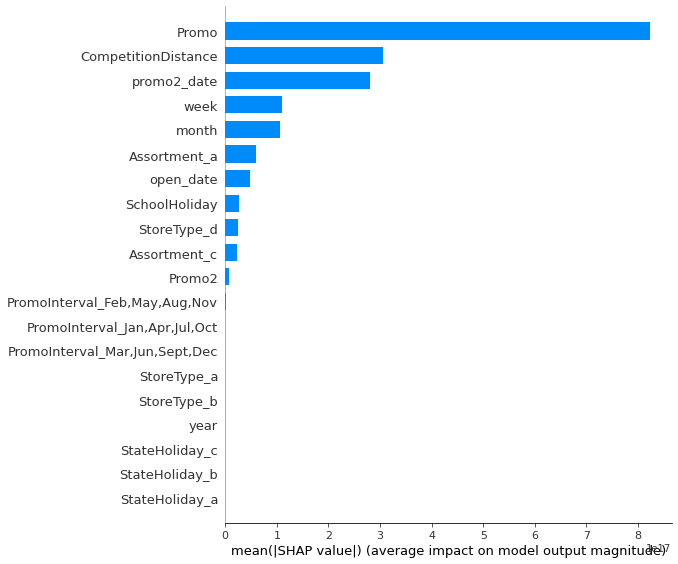

In [329]:
shap.summary_plot(shap_values2, train[input_var2], plot_type='bar')

# 5. 변수 중요도

### 5.1 중요도 상위 변수를 이용한 시각화

In [330]:
xgb3 = XGBRegressor( n_estimators=300, learning_rate= 0.1, random_state=2020)
xgb3.fit(train[input_var2],train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1,
             random_state=2020, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [333]:
xgb3.predict(test[input_var2])

array([ 6823.216 ,  8992.582 , 10189.737 , ...,  4146.344 ,  7692.013 ,
        5900.5366], dtype=float32)

In [340]:
xgb3.feature_importances_

array([0.09230952, 0.01067569, 0.00578569, 0.00314128, 0.0022065 ,
       0.00250162, 0.02081718, 0.04030317, 0.01811236, 0.08237319,
       0.09912889, 0.03365573, 0.08026658, 0.02838017, 0.04573346,
       0.03304071, 0.06003283, 0.1359332 , 0.08990461, 0.00990589,
       0.02106035, 0.0455212 , 0.03921015], dtype=float32)

In [341]:
imp_df = pd.DataFrame({"var": input_var2,
                       "imp":xgb3.feature_importances_})

In [342]:
imp_df = imp_df.sort_values('imp', ascending = False)

In [350]:
imp_df

,var,imp
17,StoreType_d,0.135933
10,Promo2,0.099129
0,Promo,0.092310
18,Assortment_a,0.089905
9,CompetitionDistance,0.082373
12,"PromoInterval_Jan,Apr,Jul,Oct",0.080267
16,StoreType_c,0.060033
14,StoreType_a,0.045733
21,open_date,0.045521
7,month,0.040303


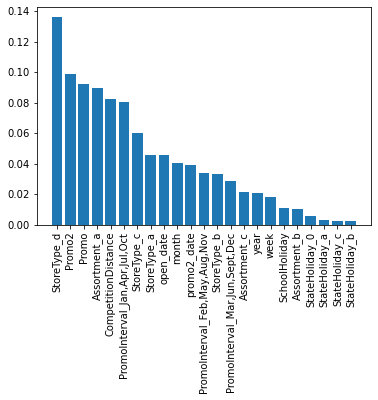

In [351]:
plt.bar(imp_df['var'], imp_df['imp'])
plt.xticks(rotation=90)
plt.show()

In [352]:
from sklearn.model_selection import cross_val_score
cross_val_score(xgb3, train[input_var2], train['Sales'], scoring="neg_mean_squared_error", cv=3)

array([-2461675.14762974, -3755138.17775034, -2554513.06287958])

In [353]:
import numpy as np
score_list=[]
selected_varnum=[]

In [354]:
for i in range(1,21):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb3, 
                             train[selected_var], 
                             train['Sales'], 
                             scoring="neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


#### 상위 5개의 변수를 사용했을 때 정확도가 가장 높음

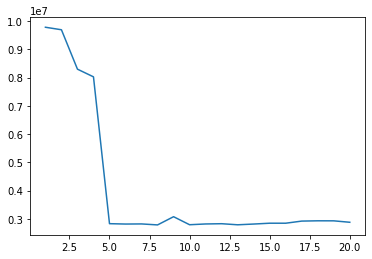

In [355]:
import matplotlib.pyplot as plt
plt.plot(selected_varnum, score_list)

In [356]:
xgb4 = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=2020)
xgb4.fit(train[['StoreType_d','Promo2' ,'Promo','Assortment_a','CompetitionDistance']], train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1,
             random_state=2020, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [357]:
test['Sales'] = xgb4.predict(test[['StoreType_d','Promo2' ,'Promo','Assortment_a','CompetitionDistance']])

In [358]:
test[['id', 'Sales']].to_csv('submission-2', index=False)

### 5.2 shap value 데이터를 이용한 시각화

In [359]:
input_var3 = ['Promo', 'CompetitionDistance', 'promo2_date', 
              'week', 'month', 'Assortment_a', 'open_date', 'SchoolHoliday', 
              'StoreType_d', 'Assortment_c', 'Promo2']

In [360]:
import numpy as np
score_list2=[]
selected_varnum2=[]

for i in range(1,12):
    selected_var2 = input_var3[:i]
    scores2 = cross_val_score(xgb3, 
                             train[selected_var2], 
                             train['Sales'], 
                             scoring="neg_mean_squared_error", cv=3)
    score_list2.append(-np.mean(scores2))
    selected_varnum2.append(i)
    print(i)

1
2
3
4
5
6
7
8
9
10
11


#### 변수가 7일 때 정확도가 가장 높음

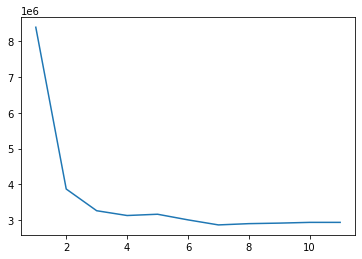

In [361]:
plt.plot(range(1,12), score_list2)

In [362]:
xgb5 = XGBRegressor(n_estimators = 300, learning_rate = 0.1, random_state = 2020)
xgb5.fit(train[['Promo','CompetitionDistance','promo2_date','week', 'month','Assortment_a']], train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1,
             random_state=2020, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [363]:
test['Sales'] = xgb5.predict(test[['Promo','CompetitionDistance','promo2_date','week', 'month','Assortment_a']])

In [364]:
test[['id','Sales']].to_csv('submission-3', index=False)